# Importing Necessary Libraries:

#### Below is the list of Libraries that is used in this project.

In [65]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import plotly.express as px
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

# Background of the Data:

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [13]:
ad_data = pd.read_csv('advertising.csv')

In [14]:
ad_data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [15]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [16]:
ad_data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

# Exploratory Data Analysis (EDA):

In [17]:
profile = ProfileReport(ad_data,title="Pandas Profile Report", explorative=True)

In [24]:
profile

In [19]:
ad_data['Age'].iplot(kind='hist',bins=80)

#### Age vs. Area Income:
From the scatter plot below it seems like the customers between age 40 to 45 have the highest area income of $80K

In [20]:
ad_data.iplot(kind='scatter',x='Age',y='Area Income',mode='markers',xTitle='Age',yTitle='Area Income')

#### Age vs. Daily Time Spent on Site:
From the Histogram below we can see that the age group between 30 to 34 spend the highest time of around 80 minutes daily on site.

In [21]:
px.density_contour(ad_data, x='Age', y='Daily Time Spent on Site', marginal_x="histogram", marginal_y="histogram")

#### Daily Time Spent on Site Vs. Daily Internet Usage:
From the histogram below we can see that there are two cluster group here. For the Higher Daily Time Spent on Site and the Higher Daily Internet Usage it belongs to upper cluster and for the Lower Daily Time Spent on Site and the Lower Daily Internet Usage it belongs to the lower cluster.

In [22]:
px.density_contour(ad_data, x='Daily Time Spent on Site',y='Daily Internet Usage', marginal_x='histogram', marginal_y='histogram')

#### Pairplot:
From the Pairplot below we can clearly see some relationship between the variables i.e Age, Area Income, Daily time spent on site and whether they clicked on the ad or not.

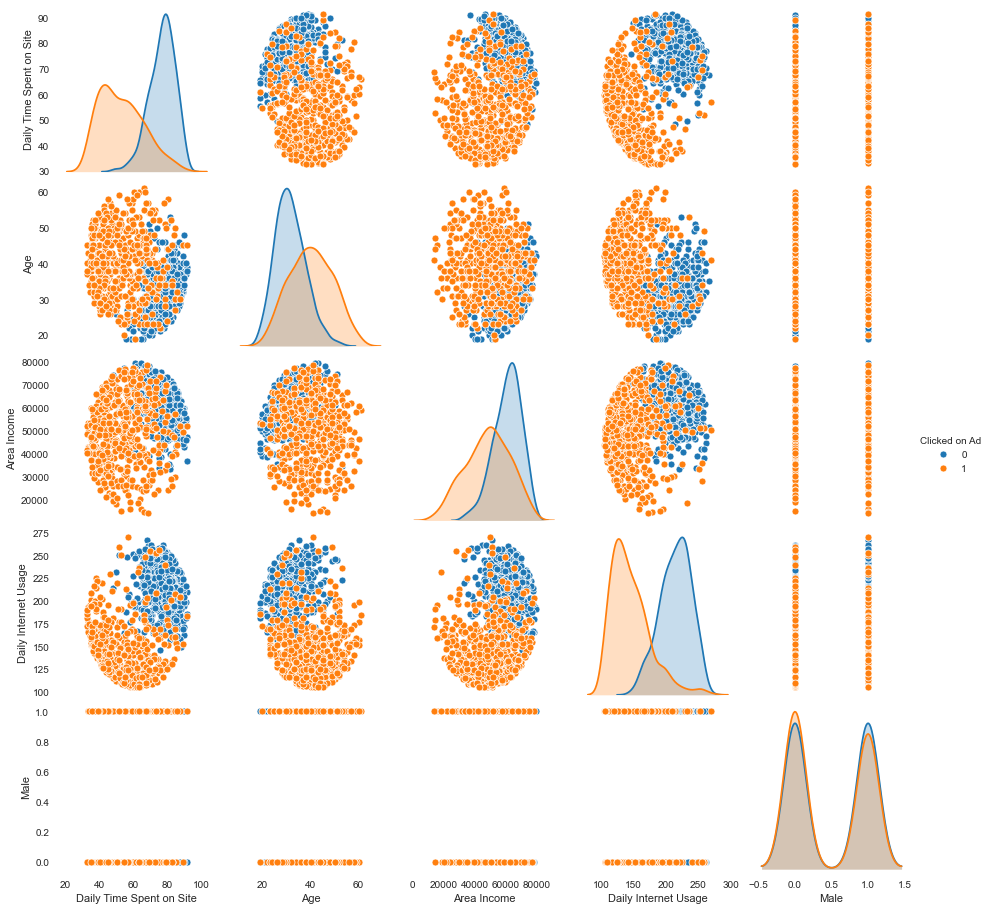

In [23]:
sns.pairplot(ad_data,hue='Clicked on Ad')

# Training and Testing Data:

In [50]:
X = ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = ad_data[['Clicked on Ad']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Model:

In [70]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train.values.ravel())

LogisticRegression()

# Predicting Test Data:

In [71]:
predictions = logmodel.predict(X_test)

# Classification Report for the Model:

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Evaluating the Model:

In [64]:
print('MAE ',metrics.mean_absolute_error(y_test,predictions))
print('MSE ',metrics.mean_squared_error(y_test,predictions))
print('RMSE ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE  0.07333333333333333
MSE  0.07333333333333333
RMSE  0.27080128015453203


#### Additionally, I am also running the Statsmodel in order to show the R-squared along with other OLS Regression Results.

In [73]:
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
predictions1 = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:          Clicked on Ad   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     931.2
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:02:31   Log-Likelihood:                 143.05
No. Observations:                1000   AIC:                            -274.1
Df Residuals:                     994   BIC:                            -244.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   